#### General

In [4]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
db_path= r'C:\PI\Proyecto Final\travel.sqlite'

In [6]:
conexion = sqlite3.connect(db_path)

In [7]:
df_tickets_flights= pd.read_sql_query("SELECT * FROM ticket_flights", conexion)

print(df_tickets_flights.head())

       ticket_no  flight_id fare_conditions  amount
0  0005432159776      30625        Business   42100
1  0005435212351      30625        Business   42100
2  0005435212386      30625        Business   42100
3  0005435212381      30625        Business   42100
4  0005432211370      30625        Business   42100


In [8]:
df_boarding_passes= pd.read_sql_query("SELECT * FROM boarding_passes", conexion)

print(df_boarding_passes.head())

       ticket_no  flight_id  boarding_no seat_no
0  0005435212351      30625            1      2D
1  0005435212386      30625            2      3G
2  0005435212381      30625            3      4H
3  0005432211370      30625            4      5D
4  0005435212357      30625            5     11A


In [9]:
df_bookings= pd.read_sql_query("SELECT * FROM bookings", conexion)

print(df_bookings.head())

  book_ref               book_date  total_amount
0   00000F  2017-07-05 03:12:00+03        265700
1   000012  2017-07-14 09:02:00+03         37900
2   000068  2017-08-15 14:27:00+03         18100
3   000181  2017-08-10 13:28:00+03        131800
4   0002D8  2017-08-07 21:40:00+03         23600


In [10]:
df_seats= pd.read_sql_query("SELECT * FROM seats", conexion)

print(df_seats.head())

  aircraft_code seat_no fare_conditions
0           319      2A        Business
1           319      2C        Business
2           319      2D        Business
3           319      2F        Business
4           319      3A        Business


In [11]:
df_tickets= pd.read_sql_query("SELECT * FROM tickets", conexion)

print(df_tickets.head())

       ticket_no book_ref passenger_id
0  0005432000987   06B046  8149 604011
1  0005432000988   06B046  8499 420203
2  0005432000989   E170C3  1011 752484
3  0005432000990   E170C3  4849 400049
4  0005432000991   F313DD  6615 976589


In [12]:
df_aircrafts= pd.read_sql_query("SELECT * FROM aircrafts_data", conexion)

print(df_aircrafts.head())

  aircraft_code                                              model  range
0           773    {"en": "Boeing 777-300", "ru": "Боинг 777-300"}  11100
1           763    {"en": "Boeing 767-300", "ru": "Боинг 767-300"}   7900
2           SU9  {"en": "Sukhoi Superjet-100", "ru": "Сухой Суп...   3000
3           320  {"en": "Airbus A320-200", "ru": "Аэробус A320-...   5700
4           321  {"en": "Airbus A321-200", "ru": "Аэробус A321-...   5600


In [13]:
df_tickets_flights.columns

Index(['ticket_no', 'flight_id', 'fare_conditions', 'amount'], dtype='object')

In [14]:
df_flights= pd.read_sql_query("SELECT * FROM flights", conexion)

print(df_flights.head())

   flight_id flight_no     scheduled_departure       scheduled_arrival  \
0       1185    PG0134  2017-09-10 09:50:00+03  2017-09-10 14:55:00+03   
1       3979    PG0052  2017-08-25 14:50:00+03  2017-08-25 17:35:00+03   
2       4739    PG0561  2017-09-05 12:30:00+03  2017-09-05 14:15:00+03   
3       5502    PG0529  2017-09-12 09:50:00+03  2017-09-12 11:20:00+03   
4       6938    PG0461  2017-09-04 12:25:00+03  2017-09-04 13:20:00+03   

  departure_airport arrival_airport     status aircraft_code actual_departure  \
0               DME             BTK  Scheduled           319               \N   
1               VKO             HMA  Scheduled           CR2               \N   
2               VKO             AER  Scheduled           763               \N   
3               SVO             UFA  Scheduled           763               \N   
4               SVO             ULV  Scheduled           SU9               \N   

  actual_arrival  
0             \N  
1             \N  
2          

#### Por Clase

In [15]:
Tickets_por_clase = df_tickets_flights.groupby('fare_conditions')['ticket_no'].count()
print(Tickets_por_clase)

fare_conditions
Business    107642
Comfort      17291
Economy     920793
Name: ticket_no, dtype: int64


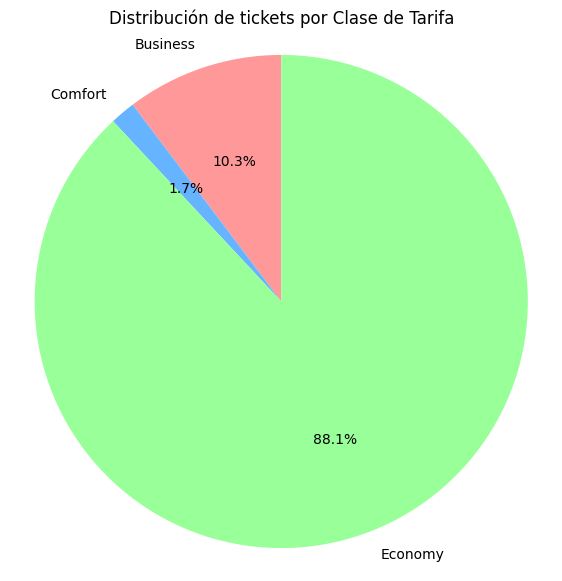

In [16]:
labels1 = Tickets_por_clase.index  # Las clases de tarifa (fare_conditions)
sizes1 = Tickets_por_clase.values  # Los ingresos totales por cada clase

plt.figure(figsize=(7, 7))  
plt.pie(sizes1, labels=labels1, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])

plt.axis('equal')# Asegurar que el gráfico sea circular

plt.title('Distribución de tickets por Clase de Tarifa')
plt.show()

In [17]:
Ingresos_por_clase = df_tickets_flights.groupby('fare_conditions')['amount'].sum()
print(Ingresos_por_clase)

fare_conditions
Business     5505179600
Comfort       566116900
Economy     14695684400
Name: amount, dtype: int64


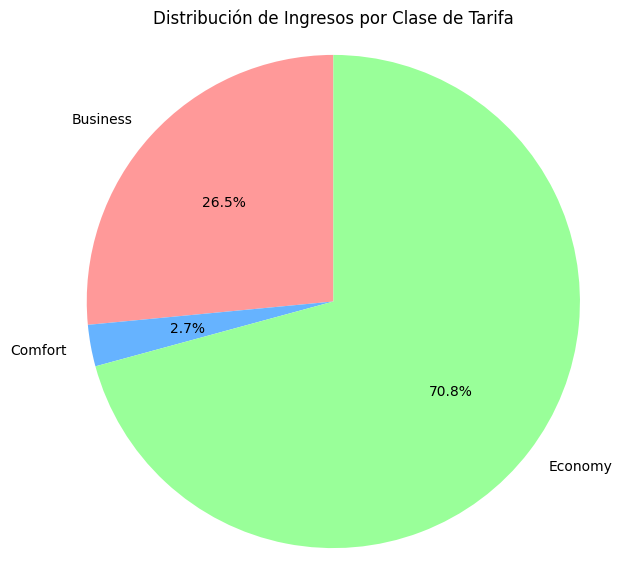

In [18]:
labels = Ingresos_por_clase.index  # Las clases de tarifa (fare_conditions)
sizes = Ingresos_por_clase.values  # Los ingresos totales por cada clase

plt.figure(figsize=(7, 7))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])

plt.axis('equal')# Asegurar que el gráfico sea circular

plt.title('Distribución de Ingresos por Clase de Tarifa')
plt.show()

Analisis de tasa de ocupacion por clase

In [19]:
asientos = df_seats['seat_no'].count()
print(asientos)

1339


In [20]:
asientos_disponibles = df_seats.groupby(['aircraft_code', 'fare_conditions']).size().reset_index(name='total_asientos')
print(asientos_disponibles)
print(asientos_disponibles['total_asientos'].sum())


   aircraft_code fare_conditions  total_asientos
0            319        Business              20
1            319         Economy              96
2            320        Business              20
3            320         Economy             120
4            321        Business              28
5            321         Economy             142
6            733        Business              12
7            733         Economy             118
8            763        Business              30
9            763         Economy             192
10           773        Business              30
11           773         Comfort              48
12           773         Economy             324
13           CN1         Economy              12
14           CR2         Economy              50
15           SU9        Business              12
16           SU9         Economy              85
1339


In [21]:
## traemos el amount y fare conditions a la de boarding passes

pasajeros_abordaron = pd.merge(df_tickets_flights, df_boarding_passes, on=['ticket_no', 'flight_id'])
print(pasajeros_abordaron)




            ticket_no  flight_id fare_conditions  amount  boarding_no seat_no
0       0005432159776      30625        Business   42100           24      2A
1       0005435212351      30625        Business   42100            1      2D
2       0005435212386      30625        Business   42100            2      3G
3       0005435212381      30625        Business   42100            3      4H
4       0005432211370      30625        Business   42100            4      5D
...               ...        ...             ...     ...          ...     ...
579681  0005434302855      19945         Economy   50100           83     20D
579682  0005434302871      19945         Economy   50100           85     20F
579683  0005432892791      19945         Economy   50100           86     21C
579684  0005432802482      19945         Economy   50100           89     21E
579685  0005432802476      19945         Economy   50100           88     21F

[579686 rows x 6 columns]


In [22]:
#agrupamos por flight_id y fare_conditions y contamos la cantidad de tickets / pasajeros
pasajeros_abordaron_grouped = pasajeros_abordaron.groupby(['flight_id', 'fare_conditions']).size().reset_index(name='pasajeros_abordaron')
print(pasajeros_abordaron_grouped)


       flight_id fare_conditions  pasajeros_abordaron
0              1        Business                   12
1              1         Economy                   67
2              2        Business                   14
3              2         Economy                   87
4              3        Business                   15
...          ...             ...                  ...
17919      33115         Economy                   20
17920      33116         Economy                   17
17921      33117         Economy                   16
17922      33118         Economy                   16
17923      33120         Economy                   13

[17924 rows x 3 columns]


In [23]:
#le agregams de Flights, la columna de aircraft_code para poder llevar los asientos totales
pasajeros_abordaron_grouped = pd.merge(pasajeros_abordaron_grouped, df_flights[['flight_id', 'aircraft_code']], on='flight_id')


In [24]:
print(pasajeros_abordaron_grouped)

       flight_id fare_conditions  pasajeros_abordaron aircraft_code
0              1        Business                   12           321
1              1         Economy                   67           321
2              2        Business                   14           321
3              2         Economy                   87           321
4              3        Business                   15           321
...          ...             ...                  ...           ...
17919      33115         Economy                   20           CR2
17920      33116         Economy                   17           CR2
17921      33117         Economy                   16           CR2
17922      33118         Economy                   16           CR2
17923      33120         Economy                   13           CR2

[17924 rows x 4 columns]


In [25]:
#le agregamos los asientos disponibles por aircraft
pasajeros_abordaron_grouped=pd.merge(pasajeros_abordaron_grouped, asientos_disponibles, on=['aircraft_code', 'fare_conditions'])
print(pasajeros_abordaron_grouped)

       flight_id fare_conditions  pasajeros_abordaron aircraft_code  \
0              1        Business                   12           321   
1              1         Economy                   67           321   
2              2        Business                   14           321   
3              2         Economy                   87           321   
4              3        Business                   15           321   
...          ...             ...                  ...           ...   
17919      33115         Economy                   20           CR2   
17920      33116         Economy                   17           CR2   
17921      33117         Economy                   16           CR2   
17922      33118         Economy                   16           CR2   
17923      33120         Economy                   13           CR2   

       total_asientos  
0                  28  
1                 142  
2                  28  
3                 142  
4                  28  
...

In [26]:
pasajeros_abordaron_grouped_by_fare=pasajeros_abordaron_grouped.groupby('fare_conditions').sum(numeric_only=True).reset_index()
print(pasajeros_abordaron_grouped_by_fare)

  fare_conditions  flight_id  pasajeros_abordaron  total_asientos
0        Business   88219353                59479          103704
1         Comfort    3036539                 9897           14880
2         Economy  180122811               510310          944448


In [28]:
Tasaeconomy=pasajeros_abordaron_grouped_by_fare['pasajeros_abordaron']/pasajeros_abordaron_grouped_by_fare['total_asientos']*100
print(Tasaeconomy)

0    57.354586
1    66.512097
2    54.032620
dtype: float64


In [75]:
df_melpasajeros_abordaron_grouped_by_fare_melted = pasajeros_abordaron_grouped_by_fare.melt(id_vars='fare_conditions', 
                             value_vars=['pasajeros_abordaron', 'total_asientos'], 
                             var_name='Tipo', value_name='Cantidad')
print(df_melpasajeros_abordaron_grouped_by_fare_melted)

  fare_conditions                 Tipo  Cantidad
0        Business  pasajeros_abordaron     59479
1         Comfort  pasajeros_abordaron      9897
2         Economy  pasajeros_abordaron    510310
3        Business       total_asientos    103704
4         Comfort       total_asientos     14880
5         Economy       total_asientos    944448


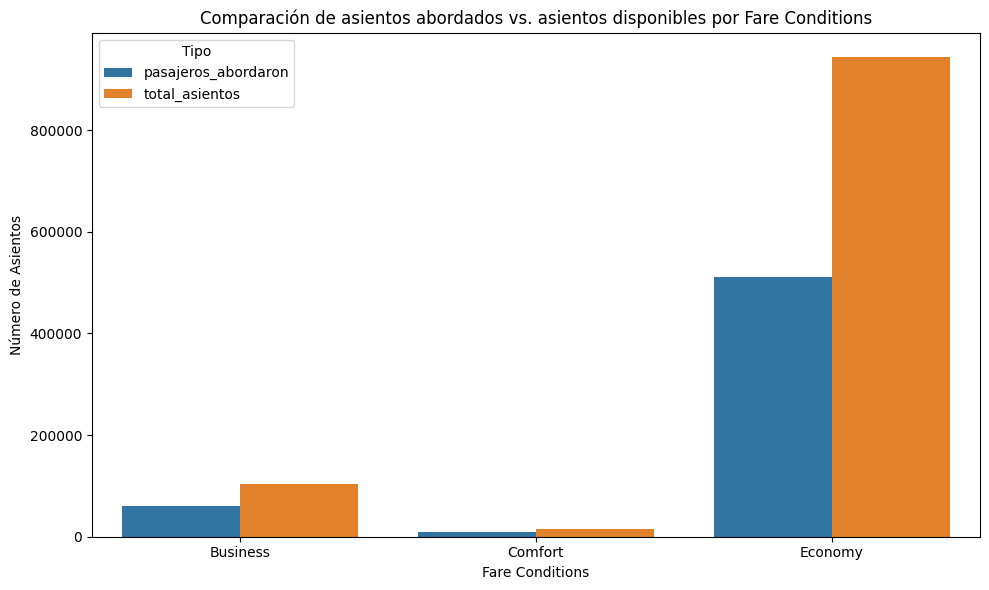

In [77]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melpasajeros_abordaron_grouped_by_fare_melted, x='fare_conditions', y='Cantidad', hue='Tipo')

plt.title('Comparación de asientos abordados vs. asientos disponibles por Fare Conditions')
plt.xlabel('Fare Conditions')
plt.ylabel('Número de Asientos')

# 4. Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Tickets con combinaciones

In [30]:
boarding_passes_groupticket =df_boarding_passes.groupby('ticket_no').count().reset_index()
print(boarding_passes_groupticket)

            ticket_no  flight_id  boarding_no  seat_no
0       0005432000987          1            1        1
1       0005432000988          1            1        1
2       0005432000989          1            1        1
3       0005432000990          1            1        1
4       0005432000991          1            1        1
...               ...        ...          ...      ...
238829  0005435999480          1            1        1
238830  0005435999481          1            1        1
238831  0005435999482          1            1        1
238832  0005435999483          1            1        1
238833  0005435999484          1            1        1

[238834 rows x 4 columns]


In [31]:
df_boarding_por_ticket =boarding_passes_groupticket.groupby('boarding_no')['ticket_no'].count().reset_index()
print(df_boarding_por_ticket)


   boarding_no  ticket_no
0            1      49417
1            2     115409
2            3       3298
3            4      67303
4            5         97
5            6       3310


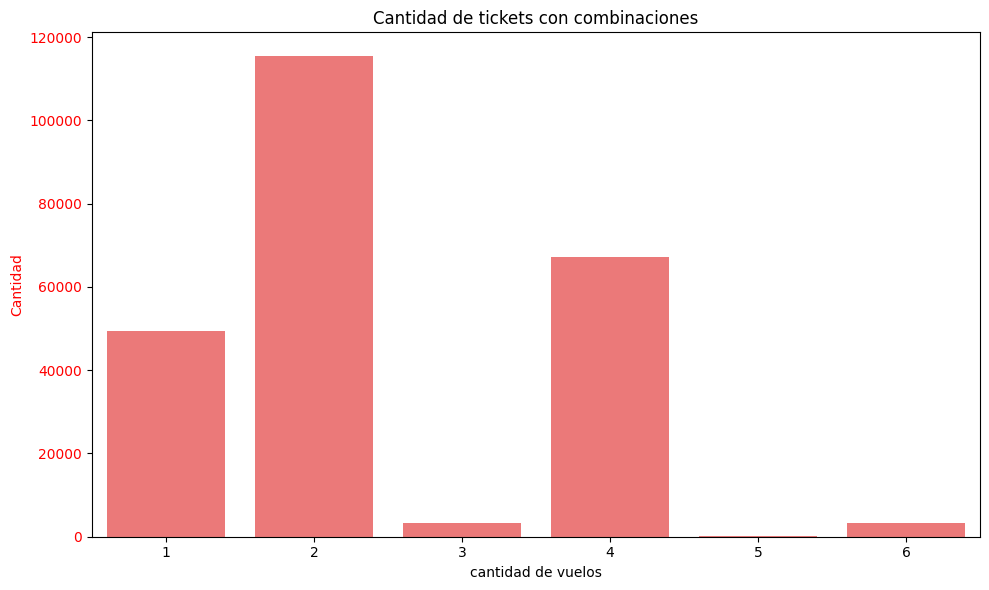

In [32]:
fig, ax1 = plt.subplots(figsize=(10, 6))


sns.barplot(data=df_boarding_por_ticket, x='boarding_no', y='ticket_no' , ax=ax1, color='red', alpha=0.6, dodge = True)
ax1.set_ylabel('Cantidad', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Título del gráfico
plt.title('Cantidad de tickets con combinaciones')
ax1.set_xlabel('cantidad de vuelos') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### Por valor

In [78]:
df_tickets_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [116]:
pd.set_option('display.float_format', '{:,.2f}'.format)


In [117]:
df_tickets_flights.describe()

,flight_id,amount,zscore
count,"1,045,726.00","1,045,726.00","1,045,726.00"
mean,"14,110.06","19,858.91",-0.00
std,"9,732.94","22,612.39",1.00
min,1.00,"3,000.00",-0.75
25%,"5,501.00","7,200.00",-0.56
50%,"11,926.00","13,400.00",-0.29
75%,"23,039.00","23,100.00",0.14
max,"33,121.00","203,300.00",8.11


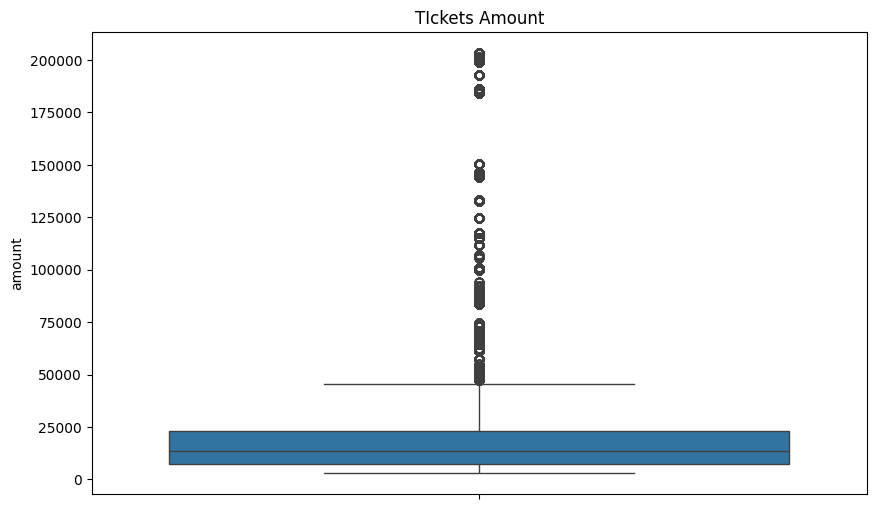

In [88]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_tickets_flights,y='amount')
plt.title('TIckets Amount')
plt.show()


In [90]:
# para identificar outliers
# Calcular la media y desviación estándar
mean = np.mean(df_tickets_flights['amount'])
std = np.std(df_tickets_flights['amount'])

# Calcular el Z-Score manualmente
df_tickets_flights['zscore'] = (df_tickets_flights['amount'] - mean) / std

# Filtrar los outliers (usando un umbral de 3 para el Z-Score)
outliers = df_tickets_flights[df_tickets_flights['zscore'].abs() > 3]

print(outliers.shape)
print(outliers['amount'].describe())
print(outliers)

(16718, 5)
count     16718.000000
mean     145021.665271
std       40155.556602
min       87700.000000
25%      105900.000000
50%      132900.000000
75%      186200.000000
max      203300.000000
Name: amount, dtype: float64
             ticket_no  flight_id fare_conditions  amount    zscore
577      0005434309500       6223        Business  124600  4.632025
578      0005434309510       6223        Business  124600  4.632025
579      0005432146164       6223        Business  124600  4.632025
580      0005434309502       6223        Business  124600  4.632025
611      0005435296942      19528        Business  124600  4.632025
...                ...        ...             ...     ...       ...
1045256  0005433763602      26273        Business  186200  7.356197
1045458  0005432954200       2471        Business   89600  3.084200
1045474  0005433570986      25290        Business  105900  3.805044
1045475  0005433570882      25290        Business  105900  3.805044
1045546  0005435846359      

In [79]:
fare_conditions= df_tickets_flights['fare_conditions'].unique()
print(fare_conditions)

['Business' 'Comfort' 'Economy']


In [81]:
amount_list = df_tickets_flights['amount'].nunique()
print(amount_list)

338


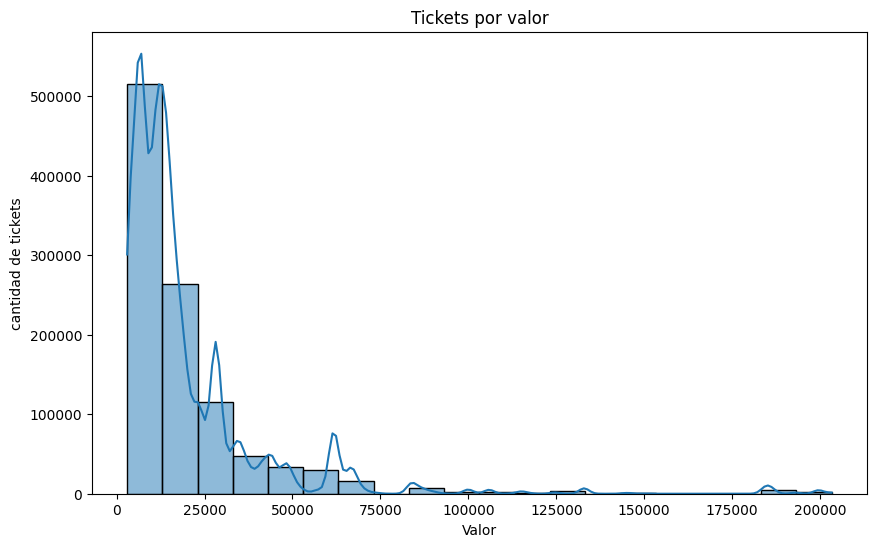

In [86]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.histplot(data=df_tickets_flights,x='amount',bins =20, kde=True)
plt.title(f'Tickets por valor')
plt.xlabel('Valor')
plt.ylabel('cantidad de tickets')
plt.show()

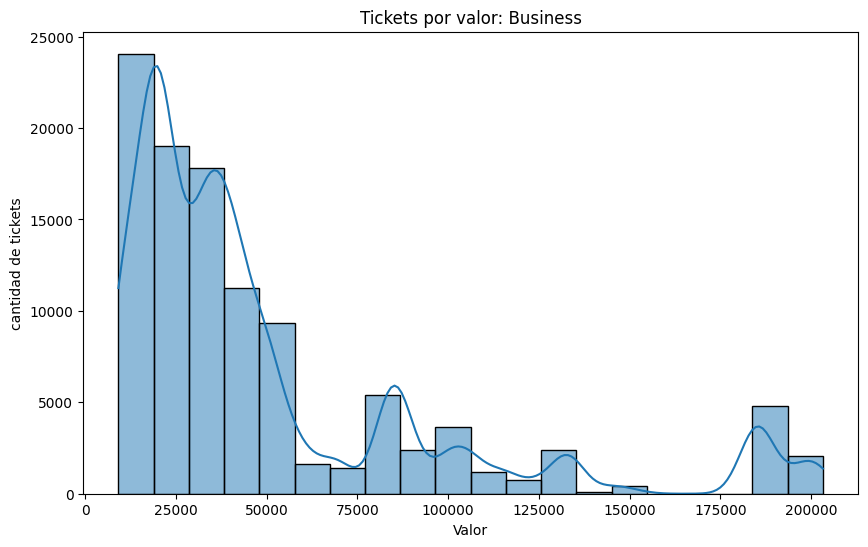

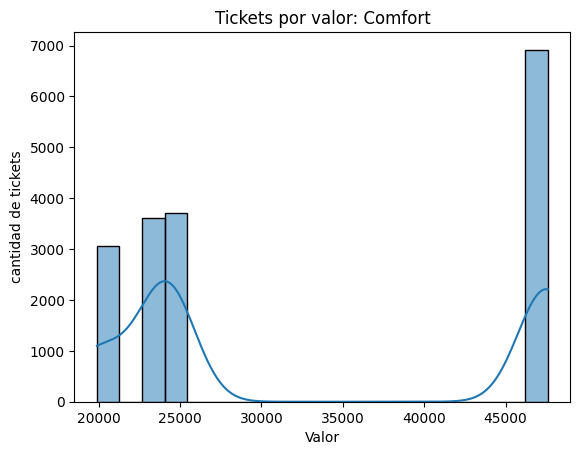

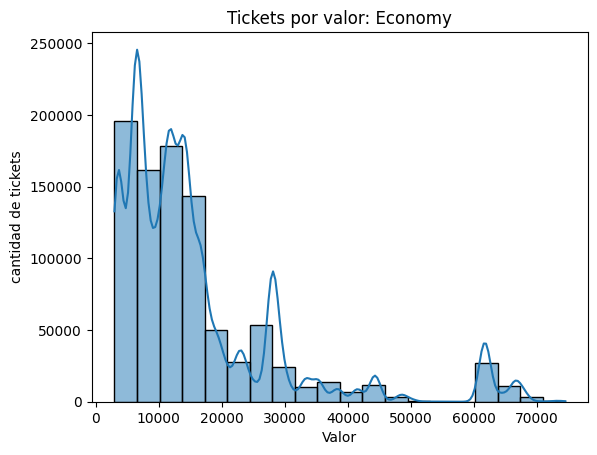

In [87]:
fig, ax1 = plt.subplots(figsize=(10, 6))


for fare in fare_conditions:
    df = df_tickets_flights[df_tickets_flights['fare_conditions']==fare]
    sns.histplot(data=df,x='amount',bins =20, kde=True)
    plt.title(f'Tickets por valor: {fare}')
    plt.xlabel('Valor')
    plt.ylabel('cantidad de tickets')
    plt.show()

In [120]:
for fare in fare_conditions:
    print(fare)
    print(df_tickets_flights[df_tickets_flights['fare_conditions']==fare].describe())
    print('-----')

Business
       flight_id     amount     zscore
count 107,642.00 107,642.00 107,642.00
mean   13,457.93  51,143.42       1.38
std     9,577.65  46,924.00       2.08
min         1.00   9,100.00      -0.48
25%     5,351.00  20,000.00       0.01
50%    11,130.00  35,000.00       0.67
75%    21,773.00  57,200.00       1.65
max    32,937.00 203,300.00       8.11
-----
Comfort
       flight_id    amount    zscore
count  17,291.00 17,291.00 17,291.00
mean    9,737.31 32,740.55      0.57
std     8,044.76 12,143.54      0.54
min       245.00 19,900.00      0.00
25%     5,276.00 23,900.00      0.18
50%     7,772.00 24,400.00      0.20
75%    10,899.00 47,400.00      1.22
max    30,635.00 47,600.00      1.23
-----
Economy
       flight_id     amount     zscore
count 920,793.00 920,793.00 920,793.00
mean   14,268.41  15,959.81      -0.17
std     9,757.60  13,703.85       0.61
min         1.00   3,000.00      -0.75
25%     5,536.00   6,800.00      -0.58
50%    12,163.00  12,100.00      -0.34
75%   

Analisis de outliers

In [95]:
## llevamos la info de tickets a tickets_flights

Tickets_flights_con_bookref = pd.merge(df_tickets_flights, df_tickets, on=['ticket_no'],how='left')
print(Tickets_flights_con_bookref)

             ticket_no  flight_id fare_conditions  amount    zscore book_ref  \
0        0005432159776      30625        Business   42100  0.983580   BA7FAF   
1        0005435212351      30625        Business   42100  0.983580   BEAA38   
2        0005435212386      30625        Business   42100  0.983580   EBE41D   
3        0005435212381      30625        Business   42100  0.983580   86D03C   
4        0005432211370      30625        Business   42100  0.983580   EA2AEA   
...                ...        ...             ...     ...       ...      ...   
1045721  0005435097522      32094         Economy    5200 -0.648269   ED1E11   
1045722  0005435097521      32094         Economy    5200 -0.648269   ED1E11   
1045723  0005435104384      32094         Economy    5200 -0.648269   125AD5   
1045724  0005435104352      32094         Economy    5200 -0.648269   0F3B0E   
1045725  0005435104389      32094         Economy    5200 -0.648269   2E9061   

        passenger_id  
0        3952 66

In [96]:
## traemos el date a tickets_flights

Tickets_flights_con_date = pd.merge(Tickets_flights_con_bookref, df_bookings, on=['book_ref'], how='left')
print(Tickets_flights_con_date)


             ticket_no  flight_id fare_conditions  amount    zscore book_ref  \
0        0005432159776      30625        Business   42100  0.983580   BA7FAF   
1        0005435212351      30625        Business   42100  0.983580   BEAA38   
2        0005435212386      30625        Business   42100  0.983580   EBE41D   
3        0005435212381      30625        Business   42100  0.983580   86D03C   
4        0005432211370      30625        Business   42100  0.983580   EA2AEA   
...                ...        ...             ...     ...       ...      ...   
1045721  0005435097522      32094         Economy    5200 -0.648269   ED1E11   
1045722  0005435097521      32094         Economy    5200 -0.648269   ED1E11   
1045723  0005435104384      32094         Economy    5200 -0.648269   125AD5   
1045724  0005435104352      32094         Economy    5200 -0.648269   0F3B0E   
1045725  0005435104389      32094         Economy    5200 -0.648269   2E9061   

        passenger_id               book

In [109]:
outliers_date = Tickets_flights_con_date[Tickets_flights_con_date['zscore'].abs() > 3]
outliers_date['book_date'] = pd.to_datetime(outliers_date['book_date'])
outliers_date['dia']=outliers_date['book_date'].dt.day
outliers_date['mes']=outliers_date['book_date'].dt.month


print(outliers_date)



             ticket_no  flight_id fare_conditions  amount    zscore book_ref  \
577      0005434309500       6223        Business  124600  4.632025   F0478D   
578      0005434309510       6223        Business  124600  4.632025   176BC8   
579      0005432146164       6223        Business  124600  4.632025   3D49C5   
580      0005434309502       6223        Business  124600  4.632025   28F3C2   
611      0005435296942      19528        Business  124600  4.632025   0CC7E5   
...                ...        ...             ...     ...       ...      ...   
1045256  0005433763602      26273        Business  186200  7.356197   AD094A   
1045458  0005432954200       2471        Business   89600  3.084200   88CA29   
1045474  0005433570986      25290        Business  105900  3.805044   528F84   
1045475  0005433570882      25290        Business  105900  3.805044   8C7D9A   
1045546  0005435846359       4123        Business   88300  3.026709   1AB940   

        passenger_id                 bo

C:\Users\PC\AppData\Local\Temp\ipykernel_8140\100124997.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_date['book_date'] = pd.to_datetime(outliers_date['book_date'])
C:\Users\PC\AppData\Local\Temp\ipykernel_8140\100124997.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_date['dia']=outliers_date['book_date'].dt.day
C:\Users\PC\AppData\Local\Temp\ipykernel_8140\100124997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [110]:
outliers_date_group=outliers_date.groupby(['dia','mes'])['ticket_no'].size().reset_index()
print(outliers_date_group)

    dia  mes  ticket_no
0     1    7        229
1     1    8        355
2     2    7        280
3     2    8        386
4     3    7        324
5     3    8        311
6     4    7        346
7     4    8        385
8     5    7        337
9     5    8        341
10    6    7        352
11    6    8        398
12    7    7        349
13    7    8        363
14    8    7        364
15    8    8        419
16    9    7        343
17    9    8        391
18   10    7        359
19   10    8        411
20   11    7        345
21   11    8        356
22   12    7        353
23   12    8        400
24   13    7        353
25   13    8        376
26   14    7        378
27   14    8        399
28   15    7        376
29   15    8        290
30   16    7        359
31   17    7        337
32   18    7        358
33   19    7        372
34   20    7        386
35   21    7        339
36   22    7        321
37   23    7        349
38   24    6          5
39   24    7        347
40   25    6    

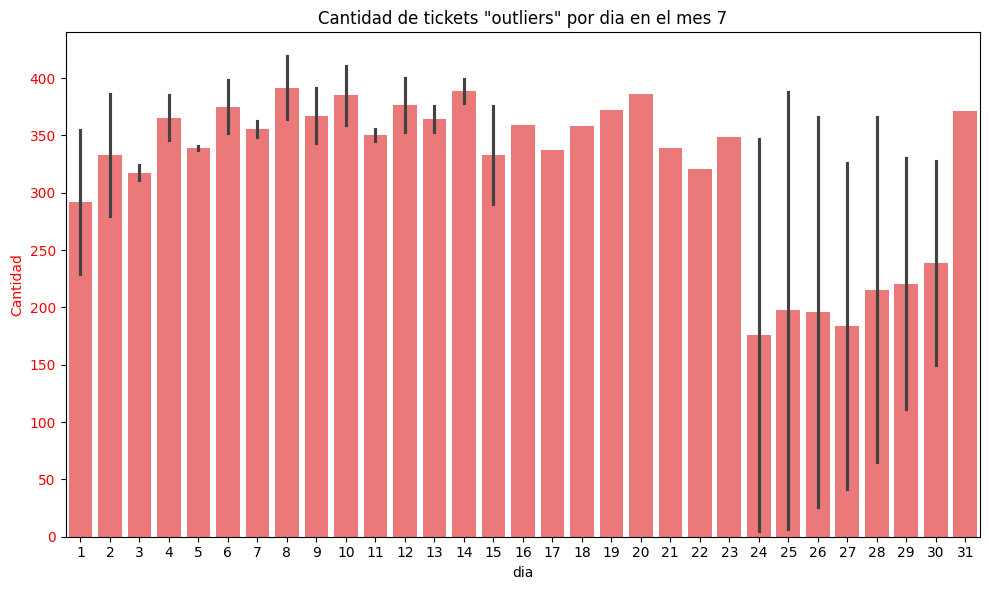

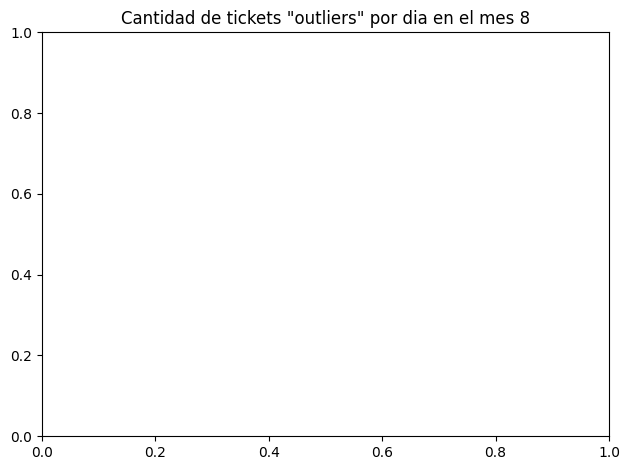

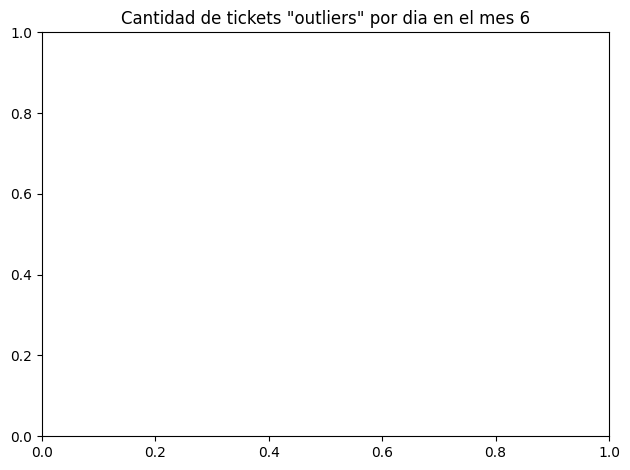

In [113]:
fig, ax1 = plt.subplots(figsize=(10, 6))

for mes in outliers_date_group['mes'].unique():
    sns.barplot(data=outliers_date_group, x='dia', y='ticket_no' , ax=ax1, color='red', alpha=0.6, dodge = True)
    ax1.set_ylabel('Cantidad', color='red')
    ax1.tick_params(axis='y', labelcolor='red')

# Título del gráfico
    plt.title(f'Cantidad de tickets "outliers" por dia en el mes {mes}')
    ax1.set_xlabel('dia') 

# Mostrar el gráfico
    plt.tight_layout()
    plt.show()

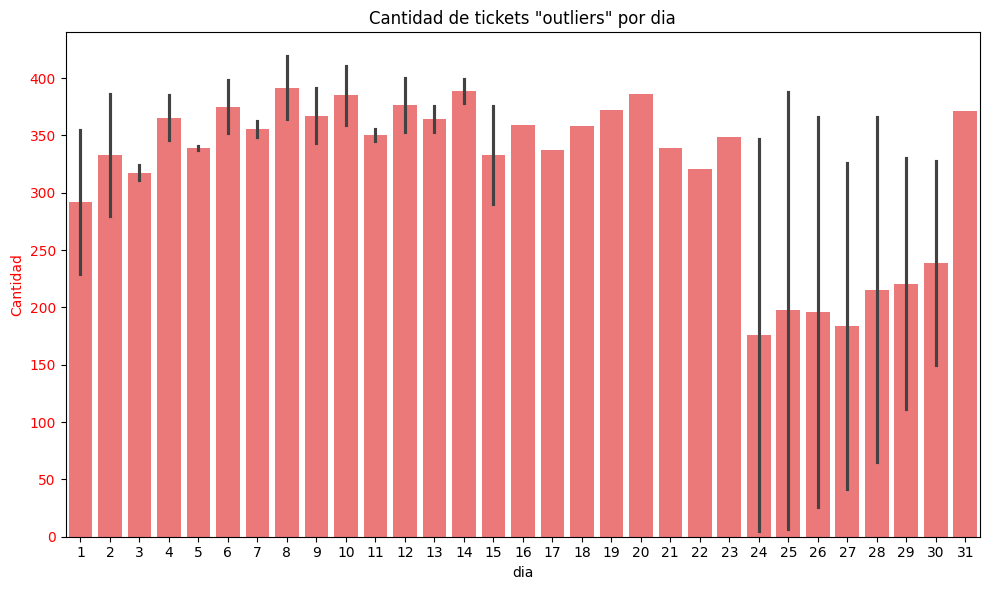

In [114]:
fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(data=outliers_date_group, x='dia', y='ticket_no' , ax=ax1, color='red', alpha=0.6, dodge = True)
ax1.set_ylabel('Cantidad', color='red')
ax1.tick_params(axis='y', labelcolor='red')

# Título del gráfico
plt.title(f'Cantidad de tickets "outliers" por dia')
ax1.set_xlabel('dia') 

# Mostrar el gráfico
plt.tight_layout()
plt.show()